# ECG Heartbeat Categorization

The goal is to be able to classify heart disease from heartbeat signal. There is a lot of data, let's try to make sens out of it.

In [1]:
import numpy as np
import pandas as pd

import os
print(os.listdir("../input"))

mit_test_data = pd.read_csv("../input/mitbih_test.csv", header=None)
mit_train_data = pd.read_csv("../input/mitbih_train.csv", header=None)

print("MIT test dataset")
print(mit_test_data.info())
print("MIT train dataset")
print(mit_train_data.info())

['mitbih_test.csv', 'mitbih_train.csv', 'ptbdb_normal.csv', 'ptbdb_abnormal.csv']
MIT test dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB
None
MIT train dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB
None


## Random sample

For now let's take a random sample of the MIT train dataset.

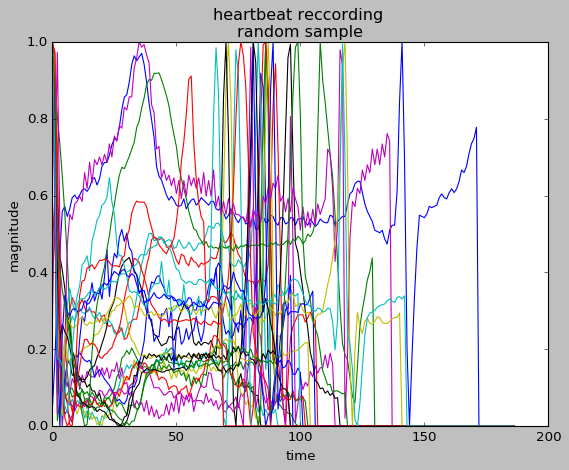

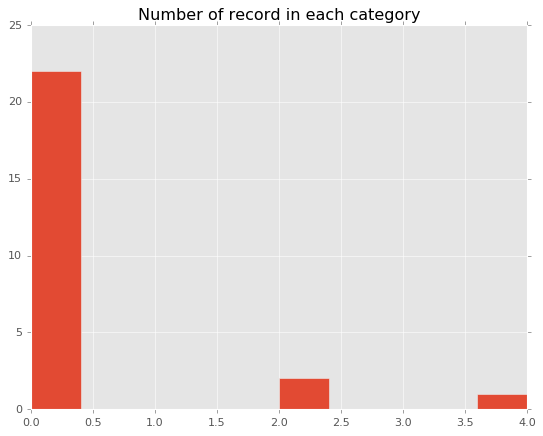

In [2]:
# take a random distribution
sample = mit_test_data.sample(25)

# remove the target column
sampleX = sample.iloc[:,sample.columns != 187]

import matplotlib.pyplot as plt

plt.style.use('classic')

# plt samples
for index, row in sampleX.iterrows():
    plt.plot(np.array(range(0, 187)) ,row)

plt.xlabel("time")
plt.ylabel("magnitude")
plt.title("heartbeat reccording \nrandom sample")

plt.show()

plt.style.use("ggplot")

plt.title("Number of record in each category")

plt.hist(sample.iloc[:,sample.columns == 187].transpose())
plt.show()

# How many date we have in each category?

In [3]:
print("Train data")
print("Type\tCount")
print((mit_train_data[187]).value_counts())
print("-------------------------")
print("Test data")
print("Type\tCount")
print((mit_test_data[187]).value_counts())

Train data
Type	Count
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
-------------------------
Test data
Type	Count
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64


# Separate features and targets

In [4]:
from keras.utils import to_categorical

print("--- X ---")
X = mit_train_data.loc[:, mit_train_data.columns != 187]
print(X.head())
print(X.info())

print("--- Y ---")
y = mit_train_data.loc[:, mit_train_data.columns == 187]
y = to_categorical(y)

print("--- testX ---")
testX = mit_test_data.loc[:, mit_test_data.columns != 187]
print(testX.head())
print(testX.info())

print("--- testy ---")
testy = mit_test_data.loc[:, mit_test_data.columns == 187]
testy = to_categorical(testy)

Using TensorFlow backend.


--- X ---
        0         1         2         3   ...   183  184  185  186
0  0.977941  0.926471  0.681373  0.245098 ...   0.0  0.0  0.0  0.0
1  0.960114  0.863248  0.461538  0.196581 ...   0.0  0.0  0.0  0.0
2  1.000000  0.659459  0.186486  0.070270 ...   0.0  0.0  0.0  0.0
3  0.925414  0.665746  0.541436  0.276243 ...   0.0  0.0  0.0  0.0
4  0.967136  1.000000  0.830986  0.586854 ...   0.0  0.0  0.0  0.0

[5 rows x 187 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 187 entries, 0 to 186
dtypes: float64(187)
memory usage: 124.9 MB
None
--- Y ---
--- testX ---
        0         1         2         3   ...   183  184  185  186
0  1.000000  0.758264  0.111570  0.000000 ...   0.0  0.0  0.0  0.0
1  0.908425  0.783883  0.531136  0.362637 ...   0.0  0.0  0.0  0.0
2  0.730088  0.212389  0.000000  0.119469 ...   0.0  0.0  0.0  0.0
3  1.000000  0.910417  0.681250  0.472917 ...   0.0  0.0  0.0  0.0
4  0.570470  0.399329  0.238255  0.147651 ...   0

# Keras model to make prediction

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(50, activation='relu', input_shape=(187,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X, y, epochs=100)

print("Evaluation: ")
mse, acc = model.evaluate(testX, testy)
print('mean_squared_error :', mse)
print('accuracy:', acc)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
87554/87554 [==============================] - 5s 59us/step - loss: 0.2590 - acc: 0.9294
Epoch 2/100
87554/87554 [==============================] - 4s 49us/step - loss: 0.1543 - acc: 0.9573
Epoch 3/100
87554/87554 [==============================] - 4s 49us/step - loss: 0.1279 - acc: 0.9641
Epoch 4/100
87554/87554 [==============================] - 4s 50us/step - loss: 0.1147 - acc: 0.9676
Epoch 5/100
87554/87554 [==============================] - 4s 49us/step - loss: 0.1043 - acc: 0.9708
Epoch 6/100
87554/87554 [==============================] - 4s 50us/step - loss: 0.0976 - acc: 0.9726
Epoch 7/100
87554/87554 [==============================] - 4s 49us/step - loss: 0.0921 - acc: 0.9732
Epoch 8/100
87554/87554 [==============================] - 4s 50us/step - loss: 0.0878 - acc: 0.9750
Epoch 9/100
87554/87554 [==============================] - 4s 49us/step 

This seems to work pretty well!

Work in progress